In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
# 2,375 ride records, #120 city records
df_city = pd.read_csv(city_data_to_load)
df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df_city_ride = pd.merge(df_ride, df_city, on = 'city', how = 'outer')

# Display the data table for preview
df_city_ride.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Group data by type and city then write to DataFrame with ride count information
type_group = df_city_ride.groupby(['type','city'])
df_type_group = pd.DataFrame(type_group['ride_id'].count())
df_type_group = df_type_group.rename(columns = {'ride_id': 'ride_count'})

# Parse grouped data by city type
df_urban_group = df_type_group.loc['Urban', :]
df_suburban_group = df_type_group.loc['Suburban', :]
df_rural_group = df_type_group.loc['Rural', :]

# Merge city type data with full data set to isolate data sets by city type
df_urban_info = pd.merge(df_city_ride, df_urban_group, on = 'city', how = 'inner')
df_suburban_info = pd.merge(df_city_ride, df_suburban_group, on = 'city', how = 'inner')
df_rural_info = pd.merge(df_city_ride, df_rural_group, on = 'city', how = 'inner')

# Group city type data sets to get aggregated calclulations 
urban_group = df_urban_info.groupby(['city'])
suburban_group = df_suburban_info.groupby(['city'])
rural_group = df_rural_info.groupby(['city'])

# Get x-axis for each city type data set (total rides)
df_total_rides_u = pd.DataFrame(urban_group['ride_id'].count())
df_total_rides_s = pd.DataFrame(suburban_group['ride_id'].count())
df_total_rides_r = pd.DataFrame(rural_group['ride_id'].count())

# Get y-axis for each city type data set (avg fare)
df_avg_fare_u = pd.DataFrame(urban_group['fare'].mean())
df_avg_fare_s = pd.DataFrame(suburban_group['fare'].mean())
df_avg_fare_r = pd.DataFrame(rural_group['fare'].mean())

# Get sizing for each city type data set (driver count)
df_drivers_u = pd.DataFrame(urban_group['driver_count'].max())
df_drivers_s = pd.DataFrame(suburban_group['driver_count'].max())
df_drivers_r = pd.DataFrame(rural_group['driver_count'].max())

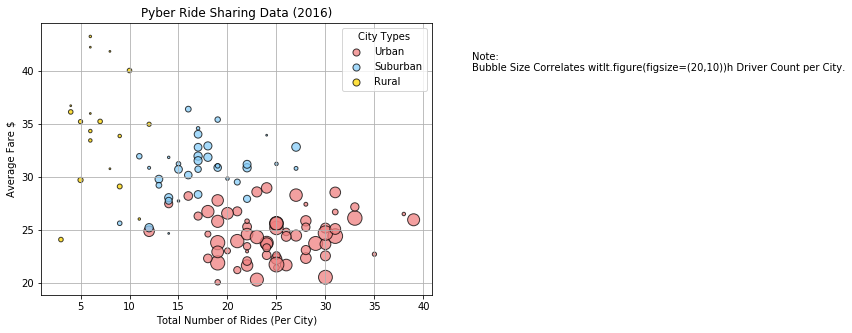

In [3]:
# Build the scatter plots for each city type
fig1, ax = plt.subplots()

#fig = plt.figure()
ax1 = plt.scatter(df_total_rides_u, df_avg_fare_u, marker="o", facecolors='lightcoral', edgecolors="black", s=df_drivers_u*3, linewidths = 1, alpha=0.75)
ax2 = plt.scatter(df_total_rides_s, df_avg_fare_s, marker="o", facecolors='lightskyblue', edgecolors="black", s=df_drivers_s*3, linewidths = 1, alpha=0.75)
ax3 = plt.scatter(df_total_rides_r, df_avg_fare_r, marker="o", facecolors='gold', edgecolors="black", s=df_drivers_r*3, linewidths = 1, alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare $")
plt.text(45,40,'Note:\nBubble Size Correlates witlt.figure(figsize=(20,10))h Driver Count per City.',multialignment = 'left')
plt.grid()
lgnd = plt.legend((ax1, ax2, ax3), ('Urban', 'Suburban', 'Rural'), title = 'City Types')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

ax.set_title("Pyber Ride Sharing Data (2016)")
fig1.set_size_inches(7,5)

# Save Figure
plt.savefig("output/scatter.png")

# Show plot
plt.show()


## Total Fares by City Type

In [4]:
# Calculate fare percents
# Group data by city type then write to DataFrame with fare totals by city type
type_only_group = df_city_ride.groupby(['type'])
df_type_only_fare = pd.DataFrame(type_only_group['fare'].sum())


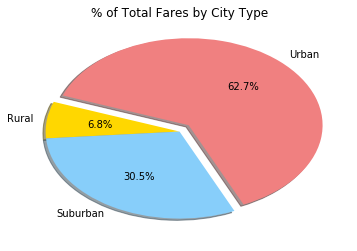

In [5]:
# Set lists to define pie chart parameters
colors = ['gold','lightskyblue','lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
explode = [0, 0, 0.1]

# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(df_type_only_fare['fare'], explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

# Add formatting
ax1.set_title("% of Total Fares by City Type")

#Save Figure
plt.savefig("output/fares.png") 

# Show Plot
plt.show()


## Total Rides by City Type

In [6]:
# Calculate Ride Percents
# reuse city type group to write to DataFrame with total ride counts by city type
df_type_only_ride = pd.DataFrame(type_only_group['ride_id'].count())


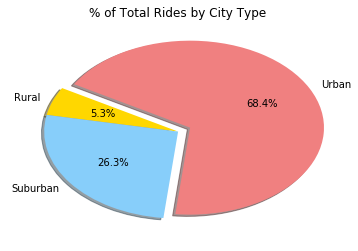

In [7]:
# Set lists to define pie chart parameters
colors = ['gold','lightskyblue','lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
explode = [0, 0, 0.1]

# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(df_type_only_ride['ride_id'], explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Add formatting
ax1.set_title("% of Total Rides by City Type")

# Save Figure
plt.savefig("output/rides.png") 

# Show Plot
plt.show()


In [8]:
# Calculate driver Percents
# Reuse city type/city datasets with driver totals to get total driver count by city type
urban_drivers = df_drivers_u['driver_count'].sum()    
suburban_drivers = df_drivers_s['driver_count'].sum()    
rural_drivers = df_drivers_r['driver_count'].sum()

# Get total drivers to determine percentage of drivers by city type for pie chart
total_drivers = urban_drivers + suburban_drivers + rural_drivers


## Total Drivers by City Type

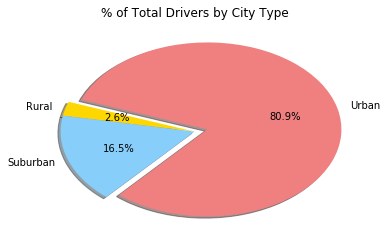

In [9]:
# Set lists to define pie chart parameters
data = [rural_drivers/total_drivers, suburban_drivers/total_drivers, urban_drivers/total_drivers]
colors = ['gold','lightskyblue','lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
explode = [0, 0, 0.1]

# Build Pie Chart
fig1, ax1 = plt.subplots()
ax1.pie(data, explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)

# Add formatting
ax1.set_title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("output/drivers.png") 

# Show Plot
plt.show()